# In this notebook we will try to find out if horror comedy movies have higher rating than other horror movies in general.

### Importing libraries that will be needed.

In [137]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

### Downloading Dataset.
- __Data Source:__ MovieLens web site (filename: ml-20m.zip)
- __Location:__ https://grouplens.org/datasets/movielens/

## Using Pandas to Read the Dataset
- __ratings.csv: userid, movieid, rating, timestamp__
- __movies.csv: movieid, title, genres__ <br>
Using the read_csv function in pandas.


In [138]:
movies = pd.read_csv('./movielens/movies.csv', sep=',')
movies.sample(3)


,movieId,title,genres
12878,60827,Lost in Beijing (Ping guo) (2007),Drama
2859,2945,Mike's Murder (1984),Mystery
21242,103413,Flicker (Flimmer) (2012),Comedy|Drama


In [139]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',')
ratings.sample(3)


,userId,movieId,rating,timestamp
14614636,100969,3926,3.0,1031675377
3654767,24901,2134,2.0,1202001133
3048846,20760,3543,3.0,1043021032


In [140]:
#Removing timestamp from ratings, becouse we will not need it.
del ratings['timestamp']
ratings.head(2)

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5


In [141]:
#checking that is the range of two dataframes.
ratings.index, movies.index

(RangeIndex(start=0, stop=20000263, step=1),
 RangeIndex(start=0, stop=27278, step=1))

In [142]:
#checking if all values are valid for out analysis.
ratings.isnull().any(),
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002170035BB00>]],
      dtype=object)

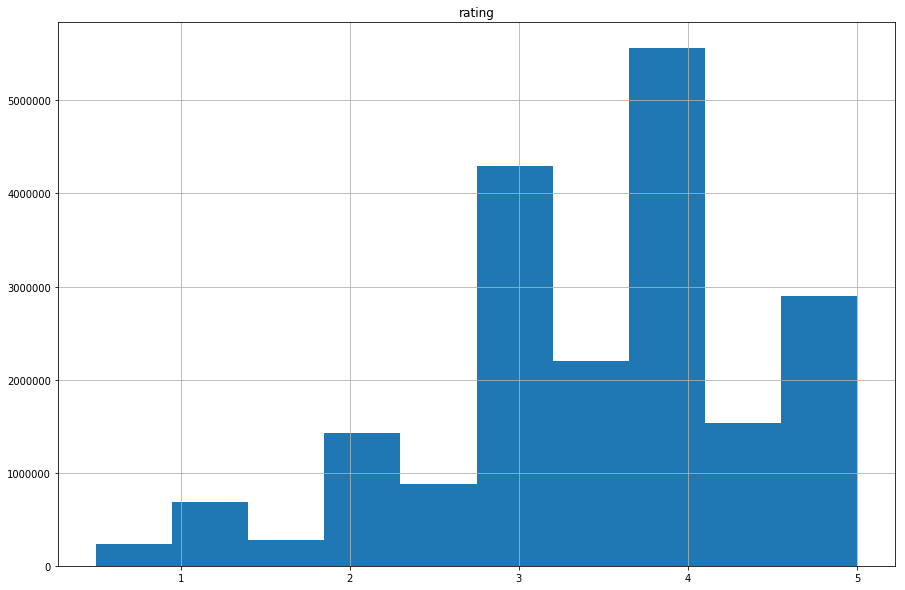

In [143]:
#checking the distribution of ratings column and checking visualy if values are between 0,5 and 5. 
ratings.hist(column='rating', figsize=(15,10))

In [144]:
ratings.groupby("movieId").size().head()

movieId
1    49695
2    22243
3    12735
4     2756
5    12161
dtype: int64

In [145]:
movie1 = ratings['movieId'][12735]
movie1

1968

In [146]:
# We see that we will have to separe ganres to separete columns or look for matching word. Becouse it reads, every thing as one name.
# we created separed column with show boolean value.
movies['Horror'] = movies['genres'] == 'Comedy'
movies.head()

,movieId,title,genres,Horror
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,False
1,2,Jumanji (1995),Adventure|Children|Fantasy,False
2,3,Grumpier Old Men (1995),Comedy|Romance,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,False
4,5,Father of the Bride Part II (1995),Comedy,True


In [147]:
#We delete this column becouse we will not need it anymore.
del movies['Horror']
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [148]:
#Want to check how many users rated movie by movieId = 1 last 5 users.
ratings[ratings.movieId==1][-5:]

,userId,movieId,rating
19998860,138483,1,4.0
19999318,138486,1,5.0
19999573,138488,1,3.0
19999786,138491,1,2.0
19999890,138493,1,3.5


In [149]:
# Just checking other movie.
ratings[ratings.movieId==112][:10]

,userId,movieId,rating
5,1,112,3.5
2082,19,112,5.0
2560,24,112,2.0
3351,29,112,4.0
4312,39,112,2.0
7481,66,112,4.0
7660,69,112,3.0
9221,88,112,2.0
13212,116,112,2.0
15007,126,112,3.0


In [198]:
#lets make avarage rating for all movies and delete userId column becouse we will not need it any more.
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.tail()

,movieId,rating
26739,131254,4.0
26740,131256,4.0
26741,131258,2.5
26742,131260,3.0
26743,131262,4.0


In [199]:
# lets check again last five ratings for movieId == 1 and we will see it has now mean value and only one intance.
avg_ratings[avg_ratings.movieId==1][-5:]

,movieId,rating
0,1,3.92124


In [200]:
#We are left with Horror movies only.
horror = movies[movies['genres'].str.contains('Horror')]
horror.head()

,movieId,title,genres
11,12,Dracula: Dead and Loving It (1995),Comedy|Horror
21,22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller
69,70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
90,92,Mary Reilly (1996),Drama|Horror|Thriller
91,93,Vampire in Brooklyn (1995),Comedy|Horror|Romance


In [215]:
#Merging data, pd =  ratings, with = horror movies on value movieId,
#if there is no movie id in horror pd will will not join that instace.
horrorRatings = horror.merge(avg_ratings, on="movieId", how='inner')
horrorRatings.tail()


,movieId,title,genres,rating
2585,131015,Hellgate (2011),Horror|Thriller,2.5
2586,131112,Night of the Living Dorks (2004),Comedy|Horror,3.5
2587,131180,Dead Rising: Watchtower (2015),Action|Horror|Thriller,2.5
2588,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0
2589,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [202]:
## Creating new dataframe in whitch we only contain comedy horror movies.
comedyHorror = horrorRatings[horrorRatings['genres'].str.contains('Comedy')]
comedyHorror.count()

movieId    392
title      392
genres     392
rating     392
dtype: int64

In [203]:
# Creating new dataframe in whitch we contain all horror movies except comedy horror.
noComedyHorror = horrorRatings[horrorRatings.genres.str.contains('Comedy') == False]
noComedyHorror.head()

,movieId,title,genres,rating
1,22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller,3.319400
3,92,Mary Reilly (1996),Drama|Horror|Thriller,2.854103
5,152,"Addiction, The (1995)",Drama|Horror,3.104455
6,177,Lord of Illusions (1995),Horror,2.885912
8,188,"Prophecy, The (1995)",Fantasy|Horror|Mystery,3.342474


In [204]:
horrorRatings.count(),noComedyHorror.count(),comedyHorror.count()

(movieId    2590
 title      2590
 genres     2590
 rating     2590
 dtype: int64, movieId    2198
 title      2198
 genres     2198
 rating     2198
 dtype: int64, movieId    392
 title      392
 genres     392
 rating     392
 dtype: int64)

In [205]:
 # We see whole rating of comedyHorror and noComedyHorror movies, and see that comedyHorror have greater value 1,5% rating.
noComedyHorror.mean(), comedyHorror.mean()

(movieId    58988.863512
 rating         2.691109
 dtype: float64, movieId    57233.456633
 rating         2.728680
 dtype: float64)

In [216]:
horrorRatings['Horror Comedy'] = horrorRatings['genres'].str.contains("Comedy")
horrorRatings.head()


,movieId,title,genres,rating,Horror Comedy
0,12,Dracula: Dead and Loving It (1995),Comedy|Horror,2.619766,True
1,22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller,3.319400,False
2,70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller,3.277454,True
3,92,Mary Reilly (1996),Drama|Horror|Thriller,2.854103,False
4,93,Vampire in Brooklyn (1995),Comedy|Horror|Romance,2.528739,True


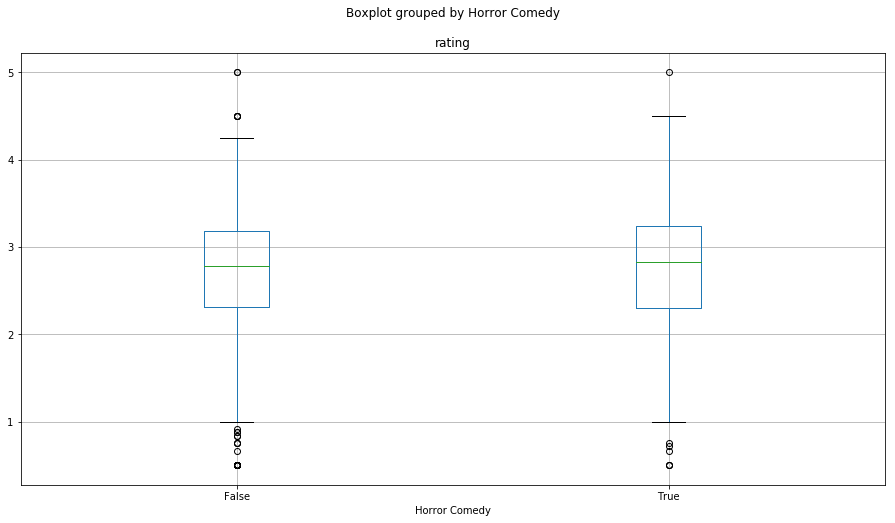

In [236]:
slice = horrorRatings.iloc[:,[3,4]]
fig, ax = plt.subplots(figsize=(15,8))
plt.suptitle('')
slice.boxplot(column='rating', by='Horror Comedy', ax=ax)

# Second part of analysis. 
## 1st. Does comedy Horror genres is getting more popular by the makers.
## 2nd. Newer comedy Horror movies are getting better.

In [158]:
# we extract year of movie from title column.
comedyHorror['year'] = comedyHorror['title'].str.extract('.*\((.*)\).*', expand=True)
comedyHorror.tail()

d:\Users\PoPis\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,movieId,title,genres,rating,year
2553,127974,100 Bloody Acres (2012),Comedy|Horror,2.5,2012
2562,129350,Hansel & Gretel Get Baked (2013),Comedy|Horror,3.5,2013
2566,129699,Arnold (1973),Comedy|Horror,1.5,1973
2586,131112,Night of the Living Dorks (2004),Comedy|Horror,3.5,2004
2588,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0,2001


In [159]:
# The sort movies by year.
comedyHorror.sort_values(by='year', ascending=True)[:5]

,movieId,title,genres,rating,year
1335,68899,"Monster, The (1925)",Comedy|Horror|Mystery|Sci-Fi,3.083333,1925
2533,126032,Betty Boop's Hallowe'en Party (1933),Animation|Comedy|Horror,1.500000,1933
2303,112854,"Ghost Goes West, The (1935)",Comedy|Fantasy|Horror|Romance,3.250000,1935
2361,115258,Charlie Chan in Honolulu (1938),Comedy|Crime|Horror|Mystery|Thriller,2.666667,1938
2067,104233,"Cat and the Canary, The (1939)",Comedy|Horror|Mystery,3.833333,1939


In [160]:
# check then the first movie was created, and the last.
byYear = comedyHorror['year'].unique().tolist()
len(byYear)
print(min(byYear)," to ",max(byYear))

1925  to  2014


In [161]:
# We check how many movies are created in a year of this genre.
yearly_average = comedyHorror.groupby('year', as_index=False).count()
yearly_average.head(5)

,year,movieId,title,genres,rating
0,1925,1,1,1,1
1,1933,1,1,1,1
2,1935,1,1,1,1
3,1938,1,1,1,1
4,1939,3,3,3,3


In [162]:
# We check the avarage movie ratings by year.
newdf = comedyHorror[['year','rating']].groupby('year').max()
newdf.tail()

,rating
year,
2010,4.500000
2011,3.714286
2012,3.672738
2013,4.000000
2014,3.795455


In [163]:
# we change year to flat becouse it was an object.
yearly_average['year'] = yearly_average.year.astype(float)
print (yearly_average.dtypes)

year       float64
movieId      int64
title        int64
genres       int64
rating       int64
dtype: object


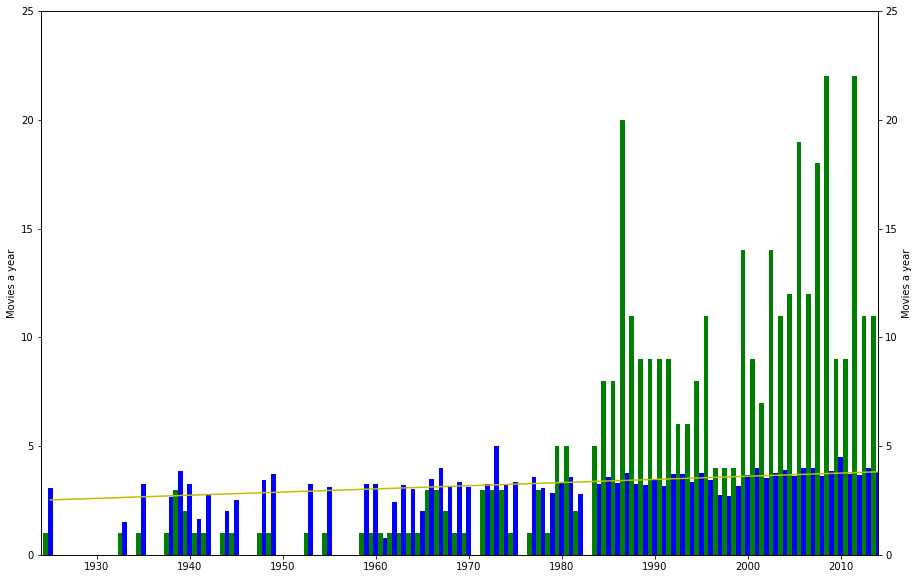

<Figure size 432x288 with 0 Axes>

In [166]:
#Ploting of our results.
# really great tutorial https://matplotlib.org/gallery/ticks_and_spines/multiple_yaxis_with_spines.html
x = yearly_average['year']
y = yearly_average['title']
d = newdf['rating']
fig = plt.figure(figsize=(15,10))
ay = plt.subplot()
ay1 = ay.twinx()
ay.bar(x -0.5, y, width=0.5, color='g',align='center')
ay1.bar(x, d, width=0.5, color='b',align='center')
c = np.polyfit(x, d, 1)
q = np.poly1d(c)
line = plt.plot(x,q(x),"y-")
ay.set_xlim(1924,2014)
ay.set_ylim(0,25)
ay1.set_ylim(0,25)
ay.set_ylabel("Movies a year")
ay1.set_ylabel("Movies a year")
plt.show()
plt.savefig("foo.png", bbox_inches='tight')